In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"

data = pd.read_csv(url)
data
# y = w*x + b
x = data["YearsExperience"]
y = data["Salary"]

data

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2
5,1.5,37.7
6,2.0,43.5
7,2.2,39.8
8,2.9,56.6
9,3.0,60.1


In [8]:
from sklearn.model_selection import train_test_split
import torch

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

x_train, x_test, y_train, x_test

(tensor([ 6.8000,  4.1000,  7.1000,  0.8000,  3.2000,  9.5000,  1.5000,  2.2000,
          4.5000,  4.9000,  5.3000,  1.1000,  8.2000,  2.9000,  3.2000,  4.0000,
          7.9000,  3.0000,  0.3000,  5.1000,  9.0000,  2.0000, 10.3000,  4.0000,
          8.7000,  3.9000], dtype=torch.float64),
 tensor([ 6.0000, 10.5000,  0.6000,  5.9000,  9.6000,  3.7000,  1.3000],
        dtype=torch.float64),
 tensor([ 91.7000,  57.0000,  98.2000,  42.8000,  64.4000, 116.9000,  37.7000,
          39.8000,  61.1000,  67.9000,  83.0000,  39.3000, 113.8000,  56.6000,
          54.4000,  55.7000, 101.3000,  60.1000,  36.2000,  66.0000, 105.5000,
          43.5000, 122.3000,  56.9000, 109.4000,  63.2000], dtype=torch.float64),
 tensor([ 6.0000, 10.5000,  0.6000,  5.9000,  9.6000,  3.7000,  1.3000],
        dtype=torch.float64))

In [9]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #self.linear_layer == nn.Linear(in_features=1, out_features=1)
    self.w = nn.Parameter(torch.rand(1, requires_grad=True))
    self.b = nn.Parameter(torch.rand(1, requires_grad=True))

  def forward(self, x):
    return self.w*x + self.b

In [10]:
torch.manual_seed(87)
model = LinearRegressionModel()
# list(model.parameters())
model.state_dict()

OrderedDict([('w', tensor([0.0036])), ('b', tensor([0.8931]))])

In [11]:
y_pred = model(x_test)
y_pred, y_test

(tensor([0.9149, 0.9312, 0.8953, 0.9145, 0.9279, 0.9065, 0.8978],
        dtype=torch.float64, grad_fn=<AddBackward0>),
 tensor([ 93.9000, 121.8000,  36.6000,  81.3000, 112.6000,  57.1000,  46.2000],
        dtype=torch.float64))

In [12]:
cost_fn = nn.MSELoss()
y_pred = model(x_train)
cost = cost_fn(y_pred, y_train)
print(model.state_dict())
print(cost)

optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model(x_train)
cost = cost_fn(y_pred, y_train)
print(model.state_dict())
print(cost)

OrderedDict([('w', tensor([0.0036])), ('b', tensor([0.8931]))])
tensor(5627.4383, dtype=torch.float64, grad_fn=<MseLossBackward0>)
OrderedDict([('w', tensor([0.8168])), ('b', tensor([1.0332]))])
tensor(4967.8156, dtype=torch.float64, grad_fn=<MseLossBackward0>)


In [13]:
epochs = 1000

train_cost_hist = []
test_cost_hist = []

for epoch in range(epochs):
  model.train()

  y_pred = model(x_train)
  train_cost = cost_fn(y_pred, y_train)
  train_cost_hist.append(train_cost.detach().numpy())

  optimizer.zero_grad()
  train_cost.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_pred = model(x_test)
    test_cost = cost_fn(test_pred, y_test)
    test_cost_hist.append(test_cost)

  if epoch%10 == 0:
    print(f"Epoch: {epoch:5},Train Cost: {train_cost: .4e},Test Cost{test_cost: .4e}")

Epoch:     0,Train Cost:  4.9678e+03,Test Cost 5.3700e+03
Epoch:    10,Train Cost:  1.4952e+03,Test Cost 1.5507e+03
Epoch:    20,Train Cost:  5.3827e+02,Test Cost 5.6718e+02
Epoch:    30,Train Cost:  2.7381e+02,Test Cost 3.3110e+02
Epoch:    40,Train Cost:  1.9998e+02,Test Cost 2.8344e+02
Epoch:    50,Train Cost:  1.7864e+02,Test Cost 2.7861e+02
Epoch:    60,Train Cost:  1.7176e+02,Test Cost 2.8085e+02
Epoch:    70,Train Cost:  1.6886e+02,Test Cost 2.8259e+02
Epoch:    80,Train Cost:  1.6708e+02,Test Cost 2.8292e+02
Epoch:    90,Train Cost:  1.6561e+02,Test Cost 2.8220e+02
Epoch:   100,Train Cost:  1.6423e+02,Test Cost 2.8086e+02
Epoch:   110,Train Cost:  1.6289e+02,Test Cost 2.7918e+02
Epoch:   120,Train Cost:  1.6158e+02,Test Cost 2.7732e+02
Epoch:   130,Train Cost:  1.6027e+02,Test Cost 2.7537e+02
Epoch:   140,Train Cost:  1.5898e+02,Test Cost 2.7339e+02
Epoch:   150,Train Cost:  1.5771e+02,Test Cost 2.7140e+02
Epoch:   160,Train Cost:  1.5644e+02,Test Cost 2.6942e+02
Epoch:   170,T

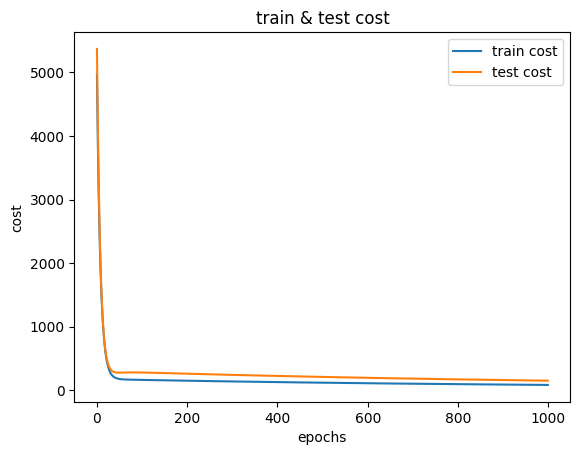

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(0, 1000), train_cost_hist, label="train cost")
plt.plot(range(0, 1000), test_cost_hist, label="test cost")
plt.title("train & test cost")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.legend()
plt.show()

In [15]:
model.state_dict()
model.w, model.b

(Parameter containing:
 tensor([11.5699], requires_grad=True),
 Parameter containing:
 tensor([12.3775], requires_grad=True))

In [16]:
model.eval()
with torch.inference_mode():
  y_pred = model(x_test)

y_pred, y_test

(tensor([ 81.7970, 133.8616,  19.3195,  80.6400, 123.4486,  55.1862,  27.4184],
        dtype=torch.float64),
 tensor([ 93.9000, 121.8000,  36.6000,  81.3000, 112.6000,  57.1000,  46.2000],
        dtype=torch.float64))

In [17]:
model.state_dict()
torch.save(obj=model.state_dict(), f="model/pytorch_linear_regression.pth")

In [18]:
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('w', tensor([0.4548])), ('b', tensor([0.9815]))])

In [19]:
model_1.eval()
with torch.inference_mode():
  y_pred = model_1(x_test)

y_pred, y_test

(tensor([3.7100, 5.7564, 1.2543, 3.6645, 5.3471, 2.6640, 1.5726],
        dtype=torch.float64),
 tensor([ 93.9000, 121.8000,  36.6000,  81.3000, 112.6000,  57.1000,  46.2000],
        dtype=torch.float64))

In [20]:
from torch import nn

class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1, dtype=torch.float64)
    #self.w = nn.Parameter(torch.rand(1, requires_grad=True))
    #self.b = nn.Parameter(torch.rand(1, requires_grad=True))

  def forward(self, x):
    return self.linear_layer(x)

In [21]:
torch.manual_seed(87)
model_2 = LinearRegressionModel2()
model_2, model_2.state_dict()

(LinearRegressionModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight',
               tensor([[-0.9419]], dtype=torch.float64)),
              ('linear_layer.bias', tensor([0.2761], dtype=torch.float64))]))

In [22]:
x_train = x_train.reshape(-1 ,1)
y_train = y_train.reshape(-1 ,1)
x_test = x_test.reshape(-1 ,1)
y_test = y_test.reshape(-1 ,1)

In [23]:
cost_fn = nn.MSELoss()

y_pred = model_2(x_train)
cost = cost_fn(y_pred, y_train)
print(model_2.state_dict())
print(cost)

optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model_2(x_train)
cost = cost_fn(y_pred, y_train)
print(model_2.state_dict())
print(cost)

OrderedDict([('linear_layer.weight', tensor([[-0.9419]], dtype=torch.float64)), ('linear_layer.bias', tensor([0.2761], dtype=torch.float64))])
tensor(6515.9517, dtype=torch.float64, grad_fn=<MseLossBackward0>)
OrderedDict([('linear_layer.weight', tensor([[-0.0652]], dtype=torch.float64)), ('linear_layer.bias', tensor([0.4264], dtype=torch.float64))])
tensor(5749.4774, dtype=torch.float64, grad_fn=<MseLossBackward0>)


In [24]:
epochs = 1000

train_cost_hist = []
test_cost_hist = []

for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(x_train)
  train_cost = cost_fn(y_pred, y_train)
  train_cost_hist.append(train_cost.detach().numpy())

  optimizer.zero_grad()
  train_cost.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(x_test)
    test_cost = cost_fn(test_pred, y_test)
    test_cost_hist.append(test_cost)

  if epoch%10 == 0:
    print(f"Epoch: {epoch:5},Train Cost: {train_cost: .4e},Test Cost{test_cost: .4e}")

Epoch:     0,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:    10,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:    20,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:    30,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:    40,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:    50,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:    60,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:    70,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:    80,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:    90,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:   100,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:   110,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:   120,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:   130,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:   140,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:   150,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:   160,Train Cost:  8.5390e+01,Test Cost 7.0985e+03
Epoch:   170,T

In [25]:
!nvidia-smi

Sat Feb 15 12:17:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [26]:
torch.cuda.is_available()

True

In [27]:
torch.cuda.device_count()

1

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [29]:
tensor = torch.tensor([1, 2, 3])
tensor = tensor.to(device)
tensor, tensor.device

(tensor([1, 2, 3], device='cuda:0'), device(type='cuda', index=0))

In [31]:
model_3 = LinearRegressionModel2()
model_3 = model_3.to(device)
model_3.linear_layer.weight.device, model_3.linear_layer.bias.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [34]:
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [35]:
cost_fn = nn.MSELoss()

y_pred = model_3(x_train)
cost = cost_fn(y_pred, y_train)
print(model_3.state_dict())
print(cost)

optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.001)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model_3(x_train)
cost = cost_fn(y_pred, y_train)
print(model_3.state_dict())
print(cost)

OrderedDict([('linear_layer.weight', tensor([[-0.9088]], device='cuda:0', dtype=torch.float64)), ('linear_layer.bias', tensor([0.9576], device='cuda:0', dtype=torch.float64))])
tensor(6385.2371, device='cuda:0', dtype=torch.float64,
       grad_fn=<MseLossBackward0>)
OrderedDict([('linear_layer.weight', tensor([[-0.0406]], device='cuda:0', dtype=torch.float64)), ('linear_layer.bias', tensor([1.1062], device='cuda:0', dtype=torch.float64))])
tensor(5633.6022, device='cuda:0', dtype=torch.float64,
       grad_fn=<MseLossBackward0>)


In [42]:
epochs = 1000

train_cost_hist = []
test_cost_hist = []

for epoch in range(epochs):
  model_3.train()

  y_pred = model_3(x_train)
  train_cost = cost_fn(y_pred, y_train)
  train_cost_hist.append(train_cost.cpu().detach().numpy())

  optimizer.zero_grad()
  train_cost.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(x_test)
    test_cost = cost_fn(test_pred, y_test)
    test_cost_hist.append(test_cost.cpu())

  if epoch%10 == 0:
    print(f"Epoch: {epoch:5},Train Cost: {train_cost: .4e},Test Cost{test_cost: .4e}")

Epoch:     0,Train Cost:  3.9409e+01,Test Cost 6.1072e+01
Epoch:    10,Train Cost:  3.9341e+01,Test Cost 6.0892e+01
Epoch:    20,Train Cost:  3.9272e+01,Test Cost 6.0713e+01
Epoch:    30,Train Cost:  3.9205e+01,Test Cost 6.0536e+01
Epoch:    40,Train Cost:  3.9138e+01,Test Cost 6.0360e+01
Epoch:    50,Train Cost:  3.9072e+01,Test Cost 6.0186e+01
Epoch:    60,Train Cost:  3.9007e+01,Test Cost 6.0013e+01
Epoch:    70,Train Cost:  3.8942e+01,Test Cost 5.9841e+01
Epoch:    80,Train Cost:  3.8878e+01,Test Cost 5.9670e+01
Epoch:    90,Train Cost:  3.8814e+01,Test Cost 5.9501e+01
Epoch:   100,Train Cost:  3.8752e+01,Test Cost 5.9333e+01
Epoch:   110,Train Cost:  3.8689e+01,Test Cost 5.9166e+01
Epoch:   120,Train Cost:  3.8628e+01,Test Cost 5.9001e+01
Epoch:   130,Train Cost:  3.8567e+01,Test Cost 5.8836e+01
Epoch:   140,Train Cost:  3.8507e+01,Test Cost 5.8673e+01
Epoch:   150,Train Cost:  3.8447e+01,Test Cost 5.8511e+01
Epoch:   160,Train Cost:  3.8388e+01,Test Cost 5.8351e+01
Epoch:   170,T

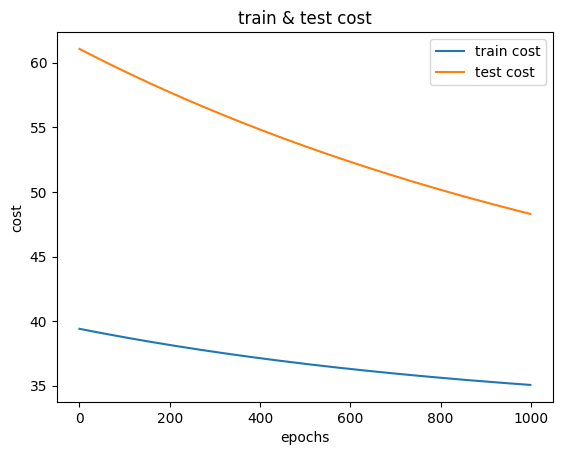

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(0, 1000), train_cost_hist, label="train cost")
plt.plot(range(0, 1000), test_cost_hist, label="test cost")
plt.title("train & test cost")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.legend()
plt.show()

In [44]:
model_3.state_dict()
torch.save(obj=model_3.state_dict(), f="model/pytorch_linear_regression_2.pth")

In [45]:
model_4 = LinearRegressionModel2()
model_4.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.6328]], dtype=torch.float64)),
             ('linear_layer.bias', tensor([0.6519], dtype=torch.float64))])

In [46]:
model_4.load_state_dict(torch.load(f="model/pytorch_linear_regression_2.pth"))
model_4.state_dict()

<ipython-input-46-85013c11fd59>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_4.load_state_dict(torch.load(f="model/pytorch_linear_regression_2.pth"))


OrderedDict([('linear_layer.weight', tensor([[9.8151]], dtype=torch.float64)),
             ('linear_layer.bias', tensor([23.5464], dtype=torch.float64))])

In [49]:
model_4.to(device)
model_4.eval()
with torch.inference_mode():
  y_pred = model_4(x_test)

y_pred

tensor([[ 82.4369],
        [126.6047],
        [ 29.4355],
        [ 81.4554],
        [117.7711],
        [ 59.8622],
        [ 36.3060]], device='cuda:0', dtype=torch.float64)